# 따릉이

- 2017.12.1~2018.10.31 까지의 따릉이 대여량 및 날씨, 계절, 기온 등의 데이터를 기반으로 2018년 11월 따릉이 대여량 예측하기
- train.csv  : 2017.12.01 ~ 2018.10.31 까지 데이터 (훈련 데이터)
- test.csv : “대여량” 변수가 없는 데이터셋
- train.csv 는 새로운 데이터셋으로 모델 성능을 평가할 수 있습니다. train.csv 로 학습을 진행해주시고, 가장 성능이 좋았던 모델로 test.csv 를 예측해보시면 됩니다.
- 따릉이 데이터셋은 범주형 변수도 존재합니다. 모델링 하실 때 수치형 변수로 변환해주시기 바랍니다.
- ***train 데이터셋에서 파생변수 생성/스케일링/변수 변환을 진행하셨다면 , test 데이터셋에도 동일하게 적용시켜주셔야 합니다 !***



변수 설명
- Date = 일/월/년
- RentedBikeCount = 빌린 자전거 수
- Temperature = 온도
- Humidity = 습도
- Wind speed = 풍속
- Visibility = 사람이 눈으로 볼 수 있는 최대 거리
- Dew point temperature = 이슬점
- Solar Radiation = 태양에서 방출되는 전자기파 중 가시광선, 자외선, 적외선을 포함한 모든 형태의 복사 에너지를 지구 대기 상층에 도달하는 양
- Rainfall = 비
- Snowfall = 눈
- Seasons = 계절
- Holiday = 휴일 유무
- Functioning Day = 정상 운영 유무 




방향 
- 날씨와 관련된 변수는 계절을 이용해서 채워넣을 수 있음
- 계절에 null값 있으면 날짜 보고 넣기
- 1시간 단위로 나눠진 데이터를 24개씩 압축하는 방법이 있음
- 반대로 시간대와 계절로 묶어서 압축할수도 있음 

In [619]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [620]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [621]:
df.shape

(8040, 14)

In [622]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [623]:
test.head(5)

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


# 데이터 구조

In [624]:
df.shape

(8040, 14)

In [625]:
df.isnull().sum()

# 온도, 풍속, 계절

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [627]:
# 컬럼 이름 바꾸기

df.rename(columns={'Rented Bike Count': 'Bike Count', 'Temperature(째C)': 'Temp', 'Humidity(%)':'Humid','Wind speed (m/s)':'Wind','Visibility (10m)':'Vis','Dew point temperature(째C)':'Dew','Solar Radiation (MJ/m2)':'Sun','Rainfall(mm)':'Rain','Snowfall (cm)':'Snow'}, inplace=True)

In [628]:
df.head()

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [629]:
numerical_var = ["Bike Count","Hour","Temp","Humid","Wind","Vis","Dew","Rain"]
categorical_var = ["Date","Seasons","Holiday","Functioning Day"]

df[numerical_var].corr()
# hour, temp

,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Rain
Bike Count,1.000000,0.410766,0.549391,-0.188578,0.115569,0.196718,0.398034,-0.123920
Hour,0.410766,1.000000,0.111295,-0.239905,0.287398,0.103468,0.002658,0.009635
Temp,0.549391,0.111295,1.000000,0.166340,-0.056962,0.033322,0.917007,0.049341
Humid,-0.188578,-0.239905,0.166340,1.000000,-0.344381,-0.537763,0.535527,0.241985
Wind,0.115569,0.287398,-0.056962,-0.344381,1.000000,0.160908,-0.196218,-0.032976
Vis,0.196718,0.103468,0.033322,-0.537763,0.160908,1.000000,-0.174204,-0.178202
Dew,0.398034,0.002658,0.917007,0.535527,-0.196218,-0.174204,1.000000,0.125273
Rain,-0.123920,0.009635,0.049341,0.241985,-0.032976,-0.178202,0.125273,1.000000


## Date

In [630]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

df.head()

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


In [631]:
df["year"].unique()

array([2017, 2018])

In [632]:
df["month"].unique()  # 11월 없음 

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [633]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

## Bike count

In [634]:
df["Bike Count"].describe()

count    8040.000000
mean      709.775995
std       657.320605
min         0.000000
25%       191.000000
50%       485.000000
75%      1080.500000
max      3556.000000
Name: Bike Count, dtype: float64

In [635]:
df[df["Bike Count"]==0]

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
3144,2018-04-11,0,0,NaN,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,2018-10-09,0,19,17.3,47,2.2,2000,5.8,0.0,0.0,0.0,Autumn,Holiday,No,2018,10,9
7508,2018-10-09,0,20,17.0,49,1.4,2000,6.1,0.0,0.0,0.0,Autumn,Holiday,No,2018,10,9
7509,2018-10-09,0,21,16.8,52,NaN,2000,6.8,0.0,0.0,0.0,Autumn,Holiday,No,2018,10,9
7510,2018-10-09,0,22,16.7,55,1.9,2000,7.6,0.0,0.0,0.0,Autumn,Holiday,No,2018,10,9


In [636]:
pd.pivot_table(data=df, index="Seasons", values="Bike Count", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
Seasons,,,,,,,,
Autumn,249.00,882.0,1361.50,1323.0,3298.0,903.069539,0.0,705.324630
Spring,204.25,578.5,1084.75,1990.0,3251.0,722.042211,0.0,619.404292
Summer,521.25,903.0,1445.75,1990.0,3418.0,1036.852261,9.0,695.141211
Winter,109.00,203.0,308.00,1935.0,937.0,226.270801,3.0,151.591280


In [637]:
pd.pivot_table(data=df, index="month", values="Bike Count", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
month,,,,,,,,
1,103.75,181.5,278.25,744.0,702.0,201.620968,18.0,127.180889
2,103.00,195.0,308.00,672.0,929.0,225.941964,7.0,160.665033
3,207.00,460.0,718.25,744.0,2100.0,511.551075,2.0,377.850544
4,169.75,655.0,1118.50,720.0,2807.0,728.093056,0.0,598.379605
5,244.50,874.0,1464.00,744.0,3251.0,950.387097,0.0,749.465355
6,639.25,1144.5,1741.75,720.0,3556.0,1245.676389,9.0,769.050023
7,505.00,829.5,1352.50,744.0,3196.0,987.177419,9.0,666.348030
8,466.75,732.5,1212.25,744.0,2836.0,876.192204,10.0,572.975581
9,253.50,915.0,1438.50,720.0,3298.0,935.572222,0.0,745.310358


## Hour

In [638]:
df["Hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

## Temp

In [639]:
df["Temp"].describe()  # 이상치 없음음

count    7240.000000
mean       13.498564
std        12.270471
min       -17.800000
25%         3.500000
50%        15.600000
75%        23.300000
max        39.400000
Name: Temp, dtype: float64

<Axes: >

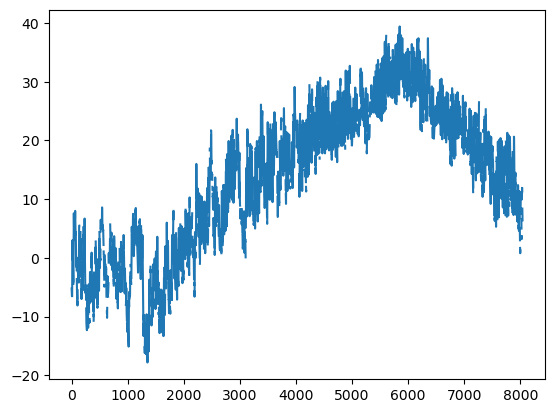

In [640]:
df["Temp"].plot()

In [641]:
df[df["Temp"].isnull()]["Date"].unique()

<DatetimeArray>
['2017-12-01 00:00:00', '2017-12-02 00:00:00', '2017-12-03 00:00:00',
 '2017-12-04 00:00:00', '2017-12-05 00:00:00', '2017-12-06 00:00:00',
 '2017-12-07 00:00:00', '2017-12-08 00:00:00', '2017-12-09 00:00:00',
 '2017-12-10 00:00:00',
 ...
 '2018-10-22 00:00:00', '2018-10-23 00:00:00', '2018-10-24 00:00:00',
 '2018-10-25 00:00:00', '2018-10-26 00:00:00', '2018-10-27 00:00:00',
 '2018-10-28 00:00:00', '2018-10-29 00:00:00', '2018-10-30 00:00:00',
 '2018-10-31 00:00:00']
Length: 314, dtype: datetime64[ns]

In [642]:
df[df["Temp"].isnull()].head(15)

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
6,2017-12-01,181,6,NaN,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
8,2017-12-01,930,8,NaN,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
21,2017-12-01,405,21,NaN,81,0.8,1687,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
22,2017-12-01,398,22,NaN,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
23,2017-12-01,323,23,NaN,84,NaN,1265,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
24,2017-12-02,328,0,NaN,87,1.1,994,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,2
30,2017-12-02,70,6,NaN,82,2.1,1178,-6.9,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,2
52,2017-12-03,76,4,NaN,73,1.0,1060,-0.8,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,3
60,2017-12-03,333,12,NaN,85,1.7,349,3.4,0.43,0.0,0.0,Winter,No Holiday,Yes,2017,12,3
88,2017-12-04,375,16,NaN,23,NaN,2000,-18.8,0.55,0.0,0.0,Winter,No Holiday,Yes,2017,12,4


## humid

In [643]:
df["Humid"].describe()  #단위가 %이므로 이상치 없어보임 

count    8040.000000
mean       58.271020
std        20.340492
min         0.000000
25%        43.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humid, dtype: float64

<Axes: >

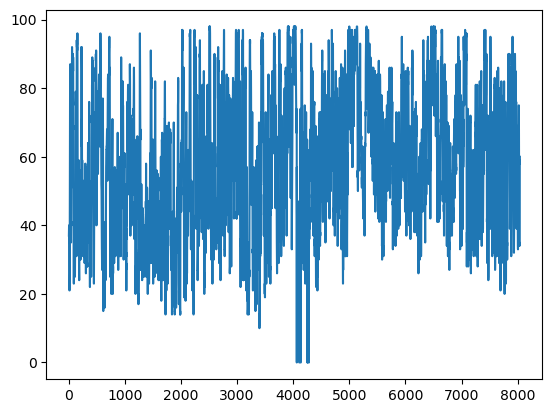

In [644]:
df["Humid"].plot()
## 중간에 왜 습도 0이 있을까?

In [645]:
df[df["Humid"]==0] 
# 습도는 0이 될 수 없기 때문에 이상치 -> 처리 필요요

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
4063,2018-05-19,436,7,11.4,0,1.4,2000,4.5,0.46,0.0,0.0,Spring,No Holiday,Yes,2018,5,19
4106,2018-05-21,262,2,13.9,0,0.9,2000,-2.1,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,5,21
4107,2018-05-21,165,3,13.0,0,0.8,2000,-2.5,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,5,21
4108,2018-05-21,113,4,12.4,0,0.8,2000,-3.4,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,5,21
4109,2018-05-21,200,5,11.9,0,1.3,2000,-2.7,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,5,21
4110,2018-05-21,467,6,11.4,0,0.9,2000,-2.0,0.03,0.0,0.0,Spring,No Holiday,Yes,2018,5,21
4111,2018-05-21,1135,7,12.3,0,NaN,1989,-2.7,0.48,0.0,0.0,Spring,No Holiday,Yes,2018,5,21
4131,2018-05-22,406,3,NaN,0,0.7,1420,10.4,0.00,0.0,0.0,NaN,Holiday,Yes,2018,5,22
4132,2018-05-22,248,4,15.6,0,0.5,1502,10.5,0.00,0.0,0.0,Spring,Holiday,Yes,2018,5,22
4133,2018-05-22,182,5,15.7,0,0.6,1610,10.6,0.00,0.0,0.0,Spring,Holiday,Yes,2018,5,22


## Wind

In [646]:
df["Wind"].describe() 

count    7238.000000
mean        1.756756
std         1.045901
min         0.000000
25%         1.000000
50%         1.600000
75%         2.400000
max         7.400000
Name: Wind, dtype: float64

<Axes: >

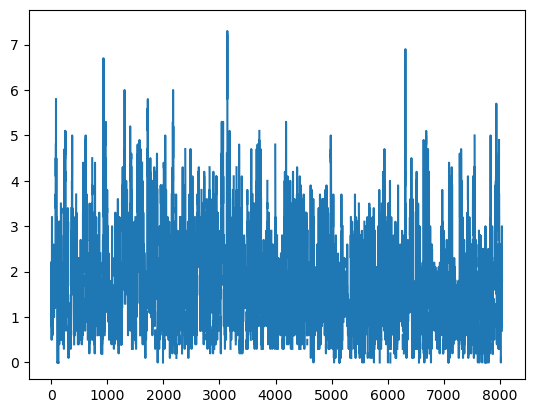

In [647]:
df["Wind"].plot()

In [648]:
df[df["Wind"]==0].head()  # 풍속 0도 처리가 필요해보임 

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
107,2017-12-05,334,11,NaN,25,0.0,1959,-21.0,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5
108,2017-12-05,321,12,-2.3,25,0.0,1962,-19.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5
109,2017-12-05,325,13,-1.6,27,0.0,1955,-18.2,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5
110,2017-12-05,334,14,-1.1,28,0.0,2000,-17.3,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5
111,2017-12-05,353,15,-0.7,28,0.0,2000,-16.9,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5


## Vis

In [649]:
df["Vis"].describe()

count    8040.000000
mean     1459.170896
std       603.716284
min        27.000000
25%       977.000000
50%      1741.000000
75%      2000.000000
max      2000.000000
Name: Vis, dtype: float64

<Axes: >

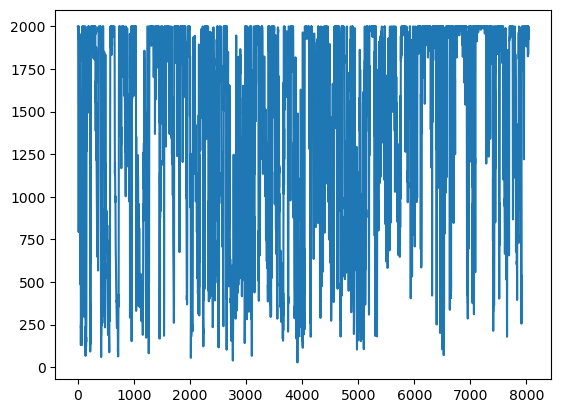

In [650]:
df["Vis"].plot()

## Dew

In [651]:
df["Dew"].describe()

count    8040.000000
mean        4.522239
std        13.393517
min       -30.600000
25%        -4.600000
50%         6.400000
75%        15.600000
max        27.200000
Name: Dew, dtype: float64

<Axes: >

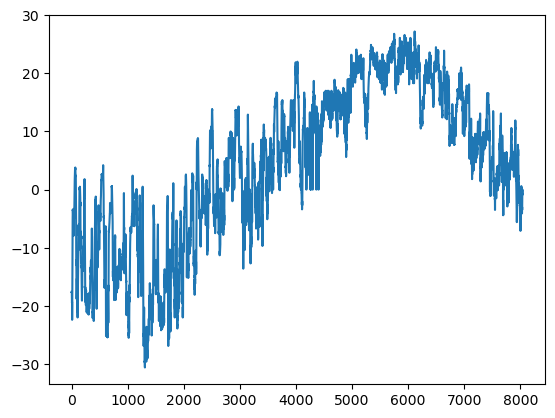

In [652]:
df["Dew"].plot()

In [653]:
df[df["Dew"]<-30]  # 한겨울에는 영하 30이하로 떨어질 수 있음 

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
1305,2018-01-24,192,9,-15.8,27,3.4,2000,-30.5,0.20,0.0,0.9,Winter,No Holiday,Yes,2018,1,24
1306,2018-01-24,90,10,-14.5,24,4.6,1902,-30.6,0.61,0.0,0.9,Winter,No Holiday,Yes,2018,1,24


## Sun

In [654]:
df["Sun"].describe()

count    8040.000000
mean        0.587072
std         0.886186
min         0.000000
25%         0.000000
50%         0.020000
75%         0.960000
max         3.520000
Name: Sun, dtype: float64

<Axes: >

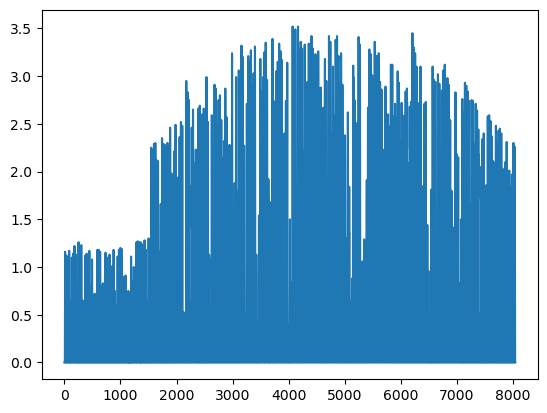

In [655]:
df["Sun"].plot()

## Rain

In [656]:
df["Rain"].describe()

count    8040.000000
mean        0.152164
std         1.127026
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rain, dtype: float64

<Axes: >

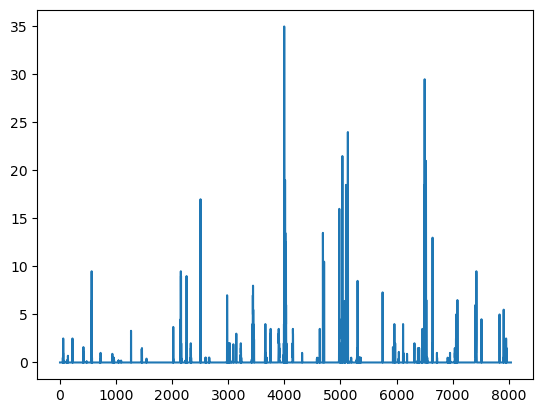

In [657]:
df["Rain"].plot()

## Snow

In [658]:
df["Snow"].describe()

count    8040.000000
mean        0.066493
std         0.378182
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.100000
Name: Snow, dtype: float64

<Axes: >

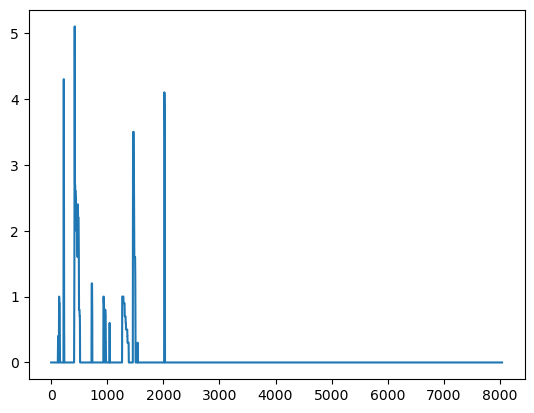

In [659]:
df["Snow"].plot()

In [660]:
# 마지막날짜 확인
df[df["Snow"] > 0].tail()

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
2025,2018-02-23,214,9,0.5,94,NaN,199,-0.3,0.37,0.0,3.7,Winter,No Holiday,Yes,2018,2,23
2026,2018-02-23,184,10,2.2,83,0.8,221,-0.3,0.92,0.0,3.7,Winter,No Holiday,Yes,2018,2,23
2027,2018-02-23,230,11,3.8,72,0.9,236,-0.7,1.10,0.0,3.4,Winter,No Holiday,Yes,2018,2,23
2028,2018-02-23,283,12,5.3,70,NaN,226,0.2,1.73,0.0,1.7,Winter,No Holiday,Yes,2018,2,23
2029,2018-02-23,304,13,6.7,64,2.0,241,0.3,1.94,0.0,0.6,Winter,No Holiday,Yes,2018,2,23


## Seasons

In [661]:
df["Seasons"].unique()

array([nan, 'Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [662]:
df[df["Seasons"].isna()]

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,NaN,No Holiday,Yes,2017,12,1
20,2017-12-01,426,20,-0.3,79,1.5,1913,-3.5,0.00,0.0,0.0,NaN,No Holiday,Yes,2017,12,1
31,2017-12-02,146,7,-4.4,81,2.5,1276,-7.1,0.00,0.0,0.0,NaN,No Holiday,Yes,2017,12,2
32,2017-12-02,219,8,-4.2,79,2.1,1436,-7.3,0.01,0.0,0.0,NaN,No Holiday,Yes,2017,12,2
36,2017-12-02,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,NaN,No Holiday,Yes,2017,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2018-10-30,182,3,1.7,59,0.5,2000,-5.4,0.00,0.0,0.0,NaN,No Holiday,Yes,2018,10,30
7998,2018-10-30,394,6,0.8,69,1.4,2000,-4.2,0.00,0.0,0.0,NaN,No Holiday,Yes,2018,10,30
8014,2018-10-30,948,22,7.6,50,1.8,2000,-2.1,0.00,0.0,0.0,NaN,No Holiday,Yes,2018,10,30
8030,2018-10-31,963,14,11.9,34,2.4,1835,-3.4,2.12,0.0,0.0,NaN,No Holiday,Yes,2018,10,31


In [663]:
# 각 계절에 어떤 달이 있는지 확인 
pd.pivot_table(data=df, index="Seasons", values="month", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
Seasons,,,,,,,,
Autumn,9.0,10.0,10.0,1323.0,10.0,9.508692,9.0,0.500113
Spring,3.0,4.0,5.0,1990.0,5.0,3.996482,3.0,0.822929
Summer,6.0,7.0,8.0,1990.0,8.0,7.010050,6.0,0.811493
Winter,1.0,2.0,12.0,1935.0,12.0,5.090439,1.0,5.011836


In [664]:
# 결측치 채우기

def season_na(month) :
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df['Seasons'] = df['month'].apply(season_na)

In [665]:
# 확인 
df['Seasons'].isna().sum()

0

In [666]:
# 추후 분석을 위해 수치형으로 변경하기
pd.pivot_table(data=df, index="Seasons", values="Temp", aggfunc="mean")

# 평균온도가 가을이 봄보다 높으므로 온도 순으로
# Winter = 0, Spring = 1, Autumn = 2, Summer=3

,Temp
Seasons,
Autumn,17.274578
Spring,13.147726
Summer,26.610258
Winter,-2.485670


In [667]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
season_order = ['Winter', 'Spring', 'Autumn', 'Summer']
encoder.fit(season_order)
df["Seasons"] = encoder.transform(df['Seasons'])

In [668]:
# 확인 
df["Seasons"].unique()

array([3, 1, 2, 0])

## Holiday

In [669]:
df["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

<Axes: xlabel='count', ylabel='Holiday'>

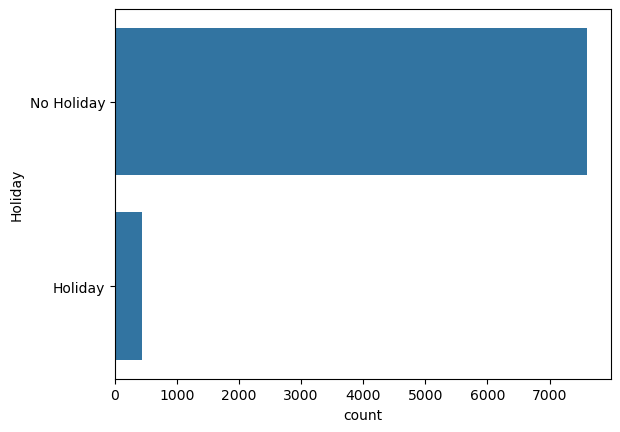

In [670]:
sns.countplot(df["Holiday"])

In [671]:
df[df["Holiday"]=="Holiday"]

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
504,2017-12-22,196,0,-1.7,79,0.5,794,-4.8,0.0,0.0,0.8,3,Holiday,Yes,2017,12,22
505,2017-12-22,250,1,-1.6,79,0.6,784,-4.7,0.0,0.0,0.8,3,Holiday,Yes,2017,12,22
506,2017-12-22,161,2,NaN,79,0.7,736,-4.2,0.0,0.0,0.8,3,Holiday,Yes,2017,12,22
507,2017-12-22,99,3,-0.6,76,0.5,789,-4.3,0.0,0.0,0.7,3,Holiday,Yes,2017,12,22
508,2017-12-22,64,4,-0.3,76,0.9,760,-4.0,0.0,0.0,0.7,3,Holiday,Yes,2017,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,2018-10-09,0,19,17.3,47,2.2,2000,5.8,0.0,0.0,0.0,0,Holiday,No,2018,10,9
7508,2018-10-09,0,20,17.0,49,1.4,2000,6.1,0.0,0.0,0.0,0,Holiday,No,2018,10,9
7509,2018-10-09,0,21,16.8,52,NaN,2000,6.8,0.0,0.0,0.0,0,Holiday,No,2018,10,9
7510,2018-10-09,0,22,16.7,55,1.9,2000,7.6,0.0,0.0,0.0,0,Holiday,No,2018,10,9


In [672]:
432 / 12

# 36일의 휴일 -> 일요일이 포함되지 않았나봄 

36.0

In [673]:
df[df["Holiday"]=="Holiday"].sample(10)

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
564,2017-12-24,4,12,4.1,91,0.8,404,2.7,0.07,9.5,0.0,3,Holiday,Yes,2017,12,24
3640,2018-05-01,1759,16,22.6,63,3.1,551,15.1,0.88,0.0,0.0,1,Holiday,Yes,2018,5,1
1825,2018-02-15,123,1,-1.1,38,2.8,1999,-13.6,0.00,0.0,0.0,3,Holiday,Yes,2018,2,15
7491,2018-10-09,0,3,11.0,66,0.9,2000,4.8,0.00,0.0,0.0,0,Holiday,No,2018,10,9
6180,2018-08-15,563,12,NaN,41,1.1,1807,21.1,2.73,0.0,0.0,2,Holiday,Yes,2018,8,15
7131,2018-09-24,216,3,15.5,63,0.3,2000,8.4,0.00,0.0,0.0,0,Holiday,Yes,2018,9,24
6176,2018-08-15,553,8,29.9,60,0.8,1772,21.2,0.83,0.0,0.0,2,Holiday,Yes,2018,8,15
7356,2018-10-03,1634,12,21.4,40,NaN,1973,7.2,2.53,0.0,0.0,0,Holiday,Yes,2018,10,3
596,2017-12-25,181,20,-2.1,49,NaN,2000,-11.4,0.00,0.0,0.0,3,Holiday,Yes,2017,12,25
576,2017-12-25,160,0,-0.6,64,2.4,1010,-6.5,0.00,0.0,0.0,3,Holiday,Yes,2017,12,25


In [674]:
# holiday도 추후의 분석을 위해 미리 수치형으로 전환

encoder = LabelEncoder()
df["Holiday"] = encoder.fit_transform(df["Holiday"])

In [675]:
# 확인 
df["Holiday"].unique()

array([1, 0])

## Functioning Day

In [676]:
df["Functioning Day"].unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='count', ylabel='Functioning Day'>

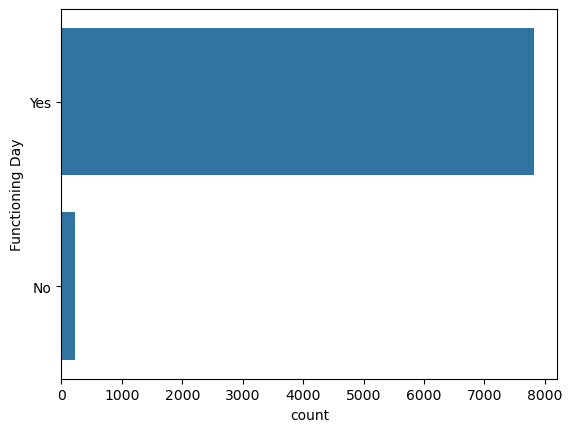

In [677]:
sns.countplot(df["Functioning Day"])

In [678]:
df[df["Functioning Day"]=="No"]

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
3144,2018-04-11,0,0,NaN,82,4.6,1041,11.3,0.0,0.0,0.0,1,1,No,2018,4,11
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,1,1,No,2018,4,11
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,1,1,No,2018,4,11
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,1,1,No,2018,4,11
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,1,1,No,2018,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,2018-10-09,0,19,17.3,47,2.2,2000,5.8,0.0,0.0,0.0,0,0,No,2018,10,9
7508,2018-10-09,0,20,17.0,49,1.4,2000,6.1,0.0,0.0,0.0,0,0,No,2018,10,9
7509,2018-10-09,0,21,16.8,52,NaN,2000,6.8,0.0,0.0,0.0,0,0,No,2018,10,9
7510,2018-10-09,0,22,16.7,55,1.9,2000,7.6,0.0,0.0,0.0,0,0,No,2018,10,9


In [679]:
df[df["Functioning Day"]=="No"].sample(10)

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
7006,2018-09-18,0,22,21.8,65,0.3,2000,14.9,0.00,0.0,0.0,0,1,No,2018,9,18
7505,2018-10-09,0,17,18.4,39,NaN,2000,4.1,0.45,0.0,0.0,0,0,No,2018,10,9
7506,2018-10-09,0,18,17.7,43,1.5,2000,4.9,0.05,0.0,0.0,0,0,No,2018,10,9
7243,2018-09-28,0,19,19.3,61,0.8,2000,11.5,0.01,0.0,0.0,0,1,No,2018,9,28
7340,2018-10-02,0,20,NaN,62,2.0,2000,9.4,0.00,0.0,0.0,0,1,No,2018,10,2
7378,2018-10-04,0,10,19.0,49,1.7,1980,8.0,1.73,0.0,0.0,0,1,No,2018,10,4
3863,2018-05-10,0,23,12.4,85,1.1,369,9.9,0.00,0.0,0.0,1,1,No,2018,5,10
7000,2018-09-18,0,16,26.4,34,2.5,1953,9.2,1.60,0.0,0.0,0,1,No,2018,9,18
7242,2018-09-28,0,18,20.4,56,1.7,2000,11.3,0.20,0.0,0.0,0,1,No,2018,9,28
7017,2018-09-19,0,9,21.5,61,NaN,1774,13.6,0.92,0.0,0.0,0,1,No,2018,9,19


In [680]:
# 여기도 수치형으로 변환하기

encoder = LabelEncoder()
df["Functioning Day"] = encoder.fit_transform(df["Functioning Day"])

In [681]:
# 확인 
df["Functioning Day"].unique()

array([1, 0])

# 결측치 & 이상치 처리
## Temp의 결측치 처리하기

In [682]:
print("결측치 비율 : ",df["Temp"].isnull().sum() / df["Date"].count() * 100)

결측치 비율 :  9.950248756218906


In [683]:
df[df["Temp"].isnull()]

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day
6,2017-12-01,181,6,NaN,35,1.3,2000,-19.5,0.00,0.0,0.0,3,1,1,2017,12,1
8,2017-12-01,930,8,NaN,37,1.1,2000,-19.8,0.01,0.0,0.0,3,1,1,2017,12,1
21,2017-12-01,405,21,NaN,81,0.8,1687,-3.6,0.00,0.0,0.0,3,1,1,2017,12,1
22,2017-12-01,398,22,NaN,83,1.5,1380,-3.4,0.00,0.0,0.0,3,1,1,2017,12,1
23,2017-12-01,323,23,NaN,84,NaN,1265,-3.6,0.00,0.0,0.0,3,1,1,2017,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,2018-10-31,141,5,NaN,74,NaN,2000,-0.1,0.00,0.0,0.0,0,1,1,2018,10,31
8025,2018-10-31,996,9,NaN,56,1.8,1825,-2.9,0.89,0.0,0.0,0,1,1,2018,10,31
8027,2018-10-31,818,11,NaN,41,2.6,1907,-3.8,1.96,0.0,0.0,0,1,1,2018,10,31
8031,2018-10-31,994,15,NaN,35,NaN,1908,-3.0,1.72,0.0,0.0,0,1,1,2018,10,31


In [684]:
# 모델을 쓸 수 있게 변수 변환

df['sin_hour'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['Hour'] / 24) 

df.head()

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day,sin_hour,cos_hour
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,0.000000,1.000000
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,0.258819,0.965926
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,2017,12,1,0.500000,0.866025
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,0.707107,0.707107
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,3,1,1,2017,12,1,0.866025,0.500000


In [685]:
tmp = df.dropna(subset=['Temp'])

X = tmp[["Vis","Dew","Sun","Rain","Snow","Seasons","month","day", "sin_hour", "cos_hour"]]
Y = tmp["Temp"]

In [686]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size=0.2)

### 랜덤 포레스트 회귀 이용 

In [687]:
from sklearn.ensemble import RandomForestRegressor

rf_temp = RandomForestRegressor(n_jobs=-1)  

In [688]:
rf_temp.fit(train_input, train_target)
rf_temp.score(test_input, test_target)

0.984571489719825

In [689]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def eval_regression(model):
    train_pred = model.predict(train_input)
    test_pred = model.predict(test_input)
    print('학습 능력')
    print('R Square : ', r2_score(train_target, train_pred))
    print('MSE : ', mean_squared_error(train_target, train_pred))
    print('MAE : ', mean_absolute_error(train_target, train_pred))
    print('일반화 능력')
    print('R Square : ', r2_score(test_target, test_pred))
    print('MSE : ', mean_squared_error(test_target, test_pred))
    print('MAE : ', mean_absolute_error(test_target, test_pred))

In [690]:
eval_regression(rf_temp)

# 과적합되어있음 

학습 능력
R Square :  0.9979217097427068
MSE :  0.3142050552486179
MAE :  0.3928062845303858
일반화 능력
R Square :  0.984571489719825
MSE :  2.2784736657458566
MAE :  1.041328729281768


In [691]:
# 과적합 해결 방안1 - X

rf1 = RandomForestRegressor(n_estimators=500, max_features='sqrt')
rf1.fit(train_input, train_target)
eval_regression(rf1)

학습 능력
R Square :  0.9979103492200201
MSE :  0.31592258899823866
MAE :  0.41782122467771904
일반화 능력
R Square :  0.9851430762874283
MSE :  2.194062084956265
MAE :  1.0941376841620647


In [692]:
from sklearn.model_selection import cross_validate

scores = cross_validate(rf_temp, train_input, train_target, return_train_score=True, n_jobs=-1) 
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9975772984348866 0.9833375642161757


In [693]:
# 과적합 해결 방안2 - X
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

hyperparam = {
    'randomforestregressor__max_depth' : range(5, 10)
}

pipe1 = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=500, max_features='sqrt')
)

grid_model1 = GridSearchCV(
    pipe1, 
    param_grid=hyperparam, 
    cv=3, # k-fold 교차검증에서 k값
    scoring='neg_mean_absolute_error', 
    n_jobs=-1
)

grid_model1.fit(train_input, train_target)
best_model1 = grid_model1.best_estimator_

In [694]:
eval_regression(best_model1)

# 과적합 해결 실패

학습 능력
R Square :  0.9795796056958453
MSE :  3.0872449591770823
MAE :  1.3769354959165367
일반화 능력
R Square :  0.9716468466842958
MSE :  4.187177633974012
MAE :  1.6087951157077534


### KNeighborsRegressor 이용 

In [695]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.fit(train_input, train_target)
eval_regression(kn)

# 더 안좋음 ㅜㅜㅜ

학습 능력
R Square :  0.9257575300796202
MSE :  11.224302900552486
MAE :  2.437430939226519
일반화 능력
R Square :  0.8833556240907587
MSE :  17.225975414364644
MAE :  3.023245856353591


### PolynomialFeatures

In [696]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    LinearRegression()
)
model.fit(train_input, train_target)
eval_regression(model)

학습 능력
R Square :  0.9598145602036242
MSE :  6.075411404687415
MAE :  1.9335455622624467
일반화 능력
R Square :  0.9609610547721872
MSE :  5.765249335469701
MAE :  1.8896527229905442


### LinearRegression

In [697]:
lr = LinearRegression()
lr.fit(train_input, train_target)
eval_regression(lr)

학습 능력
R Square :  0.9446157582236904
MSE :  8.373233087226371
MAE :  2.255232072322043
일반화 능력
R Square :  0.9481205497678528
MSE :  7.661527846872553
MAE :  2.1530856521728565


### 처음 랜덤포레스트로 Temp 데이터 채우기

In [698]:


df_null = df[df["Temp"].isnull()]
X = df_null.loc[:, ["Vis","Dew","Sun","Rain","Snow","Seasons","month","day", "sin_hour", "cos_hour"]]

df.loc[df["Temp"].isnull(), "Temp"] = rf_temp.predict(X)

In [699]:
# 확인

df["Temp"].isnull().sum()

0

## Wind 결측치와 0 값 처리하기 

In [700]:
df.head()

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day,sin_hour,cos_hour
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,0.000000,1.000000
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,0.258819,0.965926
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,2017,12,1,0.500000,0.866025
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,0.707107,0.707107
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,3,1,1,2017,12,1,0.866025,0.500000


In [701]:
df[df["Wind"]==0].head(3)

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day,sin_hour,cos_hour
107,2017-12-05,334,11,-5.21,25,0.0,1959,-21.0,0.0,0.0,0.0,3,1,1,2017,12,5,2.588190e-01,-0.965926
108,2017-12-05,321,12,-2.30,25,0.0,1962,-19.7,0.0,0.0,0.0,3,1,1,2017,12,5,1.224647e-16,-1.000000
109,2017-12-05,325,13,-1.60,27,0.0,1955,-18.2,0.0,0.0,0.0,3,1,1,2017,12,5,-2.588190e-01,-0.965926


In [702]:
df['Wind'] = df['Wind'].replace(0, np.nan)

In [703]:
# 확인 
df.iloc[107,:] 

Date               2017-12-05 00:00:00
Bike Count                         334
Hour                                11
Temp                             -5.21
Humid                               25
Wind                               NaN
Vis                               1959
Dew                              -21.0
Sun                                0.0
Rain                               0.0
Snow                               0.0
Seasons                              3
Holiday                              1
Functioning Day                      1
year                              2017
month                               12
day                                  5
sin_hour                      0.258819
cos_hour                     -0.965926
Name: 107, dtype: object

In [704]:
df["Wind"].isnull().sum()

855

In [705]:
tmp = df.dropna(subset=['Wind'])

X = tmp[["Temp","Vis","Dew","Sun","Rain","Snow","Seasons","month","day", "sin_hour", "cos_hour"]]
Y = tmp["Wind"]

In [706]:
train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size=0.2)

### RandomForestRegressor

In [707]:
rf = RandomForestRegressor()
rf.fit(train_input, train_target)
eval_regression(rf)

학습 능력
R Square :  0.9287762029207263
MSE :  0.0770344869519833
MAE :  0.20776878914405011
일반화 능력
R Square :  0.4948159888414172
MSE :  0.5395936993736952
MAE :  0.5547209464161448


### Ridge

In [708]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(train_input, train_target)
eval_regression(model)


학습 능력
R Square :  0.27402911822728737
MSE :  0.7851981600643146
MAE :  0.6924832088757921
일반화 능력
R Square :  0.2848722226059073
MSE :  0.7638374026208747
MAE :  0.6834153745265745


### Lasso

In [709]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0)
model.fit(train_input, train_target)
eval_regression(model)

학습 능력
R Square :  0.05060931629129439
MSE :  1.0268453415238579
MAE :  0.8133912623562394
일반화 능력
R Square :  0.05983208894090819
MSE :  1.0042057348516615
MAE :  0.8069836592038951


### PolynomialFeatures + StandardScaler + Ridge

In [710]:
pipe1 = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    Ridge()
)

hyperparam = {'ridge__alpha' : (0.1, 1, 1.5, 5, 10,50,100)}
grid_model = GridSearchCV(
    pipe1, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)
grid_model.fit(train_input, train_target)
model = grid_model.best_estimator_
model



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])

In [711]:
eval_regression(model)

학습 능력
R Square :  0.346471834475642
MSE :  0.7068453101960497
MAE :  0.651499523555663
일반화 능력
R Square :  0.32525122722136257
MSE :  0.7207080556973408
MAE :  0.6506232731140011


### PolynomialFeatures + LinearRegression

In [712]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.34789660611142315
0.3220284242437962


### KNeighborsRegressor

In [713]:
kn = KNeighborsRegressor()
kn.fit(train_input, train_target)
eval_regression(kn)

학습 능력
R Square :  0.4295737879564909
MSE :  0.6169636047320807
MAE :  0.592696590118302
일반화 능력
R Square :  0.07326066921935714
MSE :  0.9898624913013221
MAE :  0.7634933890048713


### PolynomialFeatures + StandardScaler + KNeighborsRegressor

In [714]:
poly = PolynomialFeatures(degree=2)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

kn = KNeighborsRegressor()
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.5827630515172246
0.34185050447932874


### LinearRegression

In [715]:
lr = LinearRegression()
lr.fit(train_input, train_target)
eval_regression(lr)

학습 능력
R Square :  0.2740291460573109
MSE :  0.7851981299638191
MAE :  0.6924770945875088
일반화 능력
R Square :  0.2848728883359354
MSE :  0.7638366915458591
MAE :  0.6834047639210028


In [716]:
model_pipe1 = make_pipeline(
    StandardScaler(),
    Lasso()
)

hyperparam = {'lasso__alpha' : (0.5, 1, 1.5)}  # 클수록 강도가 강해짐짐
grid_model = GridSearchCV(
    model_pipe1, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)

grid_model.fit(train_input, train_target)
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.5))])

In [717]:
eval_regression(best_model)

학습 능력
R Square :  0.0
MSE :  1.0815835452614544
MAE :  0.8342547030972378
일반화 능력
R Square :  -2.3667091702206378e-05
MSE :  1.068138456618477
MAE :  0.830639648827658


### 값채우기

적당한 모델이 없어서 모델을 쓰지 않고 결측치와 이상치를 채움

In [718]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df["Wind"] = imputer.fit_transform(df[["Wind"]])

In [719]:
df["Wind"].isnull().sum()

0

## Humid 이상치 처리하기

In [720]:
df["Humid"].describe()

count    8040.000000
mean       58.271020
std        20.340492
min         0.000000
25%        43.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humid, dtype: float64

In [721]:
df[df["Humid"]==0]

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day,sin_hour,cos_hour
4063,2018-05-19,436,7,11.400,0,1.400000,2000,4.5,0.46,0.0,0.0,1,1,1,2018,5,19,0.965926,-2.588190e-01
4106,2018-05-21,262,2,13.900,0,0.900000,2000,-2.1,0.00,0.0,0.0,1,1,1,2018,5,21,0.500000,8.660254e-01
4107,2018-05-21,165,3,13.000,0,0.800000,2000,-2.5,0.00,0.0,0.0,1,1,1,2018,5,21,0.707107,7.071068e-01
4108,2018-05-21,113,4,12.400,0,0.800000,2000,-3.4,0.00,0.0,0.0,1,1,1,2018,5,21,0.866025,5.000000e-01
4109,2018-05-21,200,5,11.900,0,1.300000,2000,-2.7,0.00,0.0,0.0,1,1,1,2018,5,21,0.965926,2.588190e-01
4110,2018-05-21,467,6,11.400,0,0.900000,2000,-2.0,0.03,0.0,0.0,1,1,1,2018,5,21,1.000000,6.123234e-17
4111,2018-05-21,1135,7,12.300,0,1.769715,1989,-2.7,0.48,0.0,0.0,1,1,1,2018,5,21,0.965926,-2.588190e-01
4131,2018-05-22,406,3,15.805,0,0.700000,1420,10.4,0.00,0.0,0.0,1,0,1,2018,5,22,0.707107,7.071068e-01
4132,2018-05-22,248,4,15.600,0,0.500000,1502,10.5,0.00,0.0,0.0,1,0,1,2018,5,22,0.866025,5.000000e-01
4133,2018-05-22,182,5,15.700,0,0.600000,1610,10.6,0.00,0.0,0.0,1,0,1,2018,5,22,0.965926,2.588190e-01


In [722]:
df['Humid'] = df['Humid'].replace(0, np.nan)
tmp = df.dropna(subset=['Humid'])

X = tmp[["Temp","Vis","Dew","Sun","Rain","Snow","Seasons","month","day", "sin_hour", "cos_hour"]]
Y = tmp["Humid"]

train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size=0.2)

### RandomForestRegressor

In [723]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(train_input, train_target)
eval_regression(rf)

학습 능력
R Square :  0.9966170212514804
MSE :  1.3876209566843254
MAE :  0.7307089435961357
일반화 능력
R Square :  0.9772396599453556
MSE :  9.00689813084112
MAE :  1.8886292834890965


In [724]:
df_null = df[df["Humid"].isnull()]
X = df_null.loc[:, ["Temp","Vis","Dew","Sun","Rain","Snow","Seasons","month","day", "sin_hour", "cos_hour"]]

df.loc[df["Humid"].isnull(), "Humid"] = rf.predict(X)

In [725]:
df["Humid"].isna().sum()

0

# 따릉이 수요량 예측

In [726]:
df.head(3)

,Date,Bike Count,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day,sin_hour,cos_hour
0,2017-12-01,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,0.000000,1.000000
1,2017-12-01,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,0.258819,0.965926
2,2017-12-01,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,2017,12,1,0.500000,0.866025


In [727]:
X = df.drop(columns=["Bike Count", "Date", "year", "Hour"])
Y = df["Bike Count"]

train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size=0.2)

In [728]:
ridge = Ridge()
ridge.fit(train_input, train_target)
ridge.score(test_input, test_target)

0.5570528118114602

In [729]:
rf = RandomForestRegressor()
rf.fit(train_input, train_target)
eval_regression(rf)

학습 능력
R Square :  0.9829297562070811
MSE :  7381.444404633085
MAE :  51.059745024875625
일반화 능력
R Square :  0.880591525644591
MSE :  51381.91166274875
MAE :  136.08557835820895


In [730]:
lr = LinearRegression()
lr.fit(train_input, train_target)
eval_regression(lr)

학습 능력
R Square :  0.553844974383612
MSE :  192924.51574717043
MAE :  328.7120147764995
일반화 능력
R Square :  0.5571368715203668
MSE :  190565.65515191416
MAE :  325.57399974453125


In [731]:
model_pipe1 = make_pipeline(
    StandardScaler(),
    Lasso()
)

hyperparam = {'lasso__alpha' : (0.5, 1, 1.5)}  # 클수록 강도가 강해짐짐
grid_model = GridSearchCV(
    model_pipe1, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)

grid_model.fit(train_input, train_target)
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.5))])

In [732]:
eval_regression(best_model)

학습 능력
R Square :  0.5537781330754552
MSE :  192953.41898991715
MAE :  328.57950034233454
일반화 능력
R Square :  0.5567534577619189
MSE :  190730.63952151776
MAE :  325.47078882845636


In [733]:
model_pipe = make_pipeline(
    StandardScaler(),
    Ridge(),    
)

hyperparam = {'ridge__alpha' : (0.1, 1, 1.5)}
grid_model = GridSearchCV(
    model_pipe, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2',
    n_jobs=-1
)

grid_model.fit(train_input, train_target)
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])

In [734]:
eval_regression(best_model)

학습 능력
R Square :  0.5538418615725854
MSE :  192925.86177607393
MAE :  328.7047065573105
일반화 능력
R Square :  0.5570972572318846
MSE :  190582.7013279277
MAE :  325.54337197063046


In [735]:
from sklearn.linear_model import ElasticNet

model_pipe = make_pipeline(
    StandardScaler(),
    ElasticNet()    
)
hyperparam = {'elasticnet__alpha' : (0.1, 1, 1.5)}
grid_model = GridSearchCV(
    model_pipe, 
    param_grid = hyperparam, 
    cv=3, 
    scoring='r2',
    n_jobs=-1
)

grid_model.fit(train_input, train_target)
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=0.1))])

In [736]:
eval_regression(best_model)

학습 능력
R Square :  0.5499731083193042
MSE :  194598.77209890037
MAE :  327.7168369068682
일반화 능력
R Square :  0.5519810815379778
MSE :  192784.21080181136
MAE :  325.35892987974427


In [737]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.7864891986178955
0.7778134892754321


# 결론 = RandomForestRegressor

RandomForestRegressor도 성능이 좋지는 않지만 제가 찾은 모델 중에 그나마 괜찮았습니다.. 

In [738]:
ultimate_model = RandomForestRegressor()
ultimate_model.fit(train_input, train_target)
eval_regression(ultimate_model)

학습 능력
R Square :  0.9832508461499198
MSE :  7242.6000160758695
MAE :  51.05505286069651
일반화 능력
R Square :  0.8797029349670542
MSE :  51764.27554390547
MAE :  136.9787686567164


# test.csv 예측하기

In [739]:
test = pd.read_csv("test.csv")

In [740]:
test.head()

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [741]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       720 non-null    object 
 1   Hour                       720 non-null    int64  
 2   Temperature(째C)            644 non-null    float64
 3   Humidity(%)                720 non-null    int64  
 4   Wind speed (m/s)           646 non-null    float64
 5   Visibility (10m)           720 non-null    int64  
 6   Dew point temperature(째C)  720 non-null    float64
 7   Solar Radiation (MJ/m2)    720 non-null    float64
 8   Rainfall(mm)               720 non-null    float64
 9   Snowfall (cm)              720 non-null    float64
 10  Seasons                    646 non-null    object 
 11  Holiday                    720 non-null    object 
 12  Functioning Day            720 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 7

In [742]:
test.isnull().sum()

Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64

## train.csv에 한 전처리 똑같이 하기

In [743]:
test.rename(columns={ 'Temperature(째C)': 'Temp', 'Humidity(%)':'Humid','Wind speed (m/s)':'Wind','Visibility (10m)':'Vis','Dew point temperature(째C)':'Dew','Solar Radiation (MJ/m2)':'Sun','Rainfall(mm)':'Rain','Snowfall (cm)':'Snow'}, inplace=True)

test["Date"] = pd.to_datetime(test["Date"], format="%d/%m/%Y")
test["year"] = test["Date"].dt.year
test["month"] = test["Date"].dt.month
test["day"] = test["Date"].dt.day

def season_na(month) :
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

test['Seasons'] = test['month'].apply(season_na)


encoder = LabelEncoder()
season_order = ['Winter', 'Spring', 'Autumn', 'Summer']
encoder.fit(season_order)
test["Seasons"] = encoder.transform(test['Seasons'])



encoder = LabelEncoder()
test["Holiday"] = encoder.fit_transform(test["Holiday"])



encoder = LabelEncoder()
test["Functioning Day"] = encoder.fit_transform(test["Functioning Day"])

test['sin_hour'] = np.sin(2 * np.pi * test['Hour'] / 24)
test['cos_hour'] = np.cos(2 * np.pi * test['Hour'] / 24) 

In [744]:
test.head(3)

,Date,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day,sin_hour,cos_hour
0,2018-11-01,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,0,0,1,2018,11,1,0.000000,1.000000
1,2018-11-01,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,0,0,1,2018,11,1,0.258819,0.965926
2,2018-11-01,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,0,0,1,2018,11,1,0.500000,0.866025


In [745]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             720 non-null    datetime64[ns]
 1   Hour             720 non-null    int64         
 2   Temp             644 non-null    float64       
 3   Humid            720 non-null    int64         
 4   Wind             646 non-null    float64       
 5   Vis              720 non-null    int64         
 6   Dew              720 non-null    float64       
 7   Sun              720 non-null    float64       
 8   Rain             720 non-null    float64       
 9   Snow             720 non-null    float64       
 10  Seasons          720 non-null    int32         
 11  Holiday          720 non-null    int32         
 12  Functioning Day  720 non-null    int32         
 13  year             720 non-null    int32         
 14  month            720 non-null    int32    

## null 채우기

In [746]:
test.isnull().sum()

Date                0
Hour                0
Temp               76
Humid               0
Wind               74
Vis                 0
Dew                 0
Sun                 0
Rain                0
Snow                0
Seasons             0
Holiday             0
Functioning Day     0
year                0
month               0
day                 0
sin_hour            0
cos_hour            0
dtype: int64

In [748]:
test_null = test[test["Temp"].isnull()]
X = test_null.loc[:, ["Vis","Dew","Sun","Rain","Snow","Seasons","month","day", "sin_hour", "cos_hour"]]

test.loc[test["Temp"].isnull(), "Temp"] = rf_temp.predict(X)

In [749]:
test["Temp"].isnull().sum()

0

In [750]:
imputer = KNNImputer(n_neighbors=5)
test["Wind"] = imputer.fit_transform(test[["Wind"]])

In [751]:
test["Wind"].isnull().sum()

0

In [752]:
test["Humid"].describe()  # 습도 이상치는 없음 

count    720.000000
mean      57.726389
std       20.613305
min       13.000000
25%       41.000000
50%       57.000000
75%       75.000000
max       97.000000
Name: Humid, dtype: float64

## 수요량 예측

In [753]:
test.head(3)

,Date,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day,sin_hour,cos_hour
0,2018-11-01,0,5.7,62,2.300000,1909,-1.0,0.0,0.0,0.0,0,0,1,2018,11,1,0.000000,1.000000
1,2018-11-01,1,5.1,65,1.600000,1932,-0.9,0.0,0.0,0.0,0,0,1,2018,11,1,0.258819,0.965926
2,2018-11-01,2,4.4,64,1.396285,2000,-1.8,0.0,0.0,0.0,0,0,1,2018,11,1,0.500000,0.866025


In [756]:
X = test.drop(columns=[ "Date", "year", "Hour"])
test["Bike Count"] = ultimate_model.predict(X)

In [757]:
test.head()

,Date,Hour,Temp,Humid,Wind,Vis,Dew,Sun,Rain,Snow,Seasons,Holiday,Functioning Day,year,month,day,sin_hour,cos_hour,Bike Count
0,2018-11-01,0,5.7,62,2.300000,1909,-1.0,0.0,0.0,0.0,0,0,1,2018,11,1,0.000000,1.000000,571.45
1,2018-11-01,1,5.1,65,1.600000,1932,-0.9,0.0,0.0,0.0,0,0,1,2018,11,1,0.258819,0.965926,417.65
2,2018-11-01,2,4.4,64,1.396285,2000,-1.8,0.0,0.0,0.0,0,0,1,2018,11,1,0.500000,0.866025,240.76
3,2018-11-01,3,4.2,65,0.700000,1962,-1.8,0.0,0.0,0.0,0,0,1,2018,11,1,0.707107,0.707107,170.90
4,2018-11-01,4,3.6,70,0.800000,1934,-1.3,0.0,0.0,0.0,0,0,1,2018,11,1,0.866025,0.500000,149.55
